In [29]:
# Project description

# This project is to build a Machine learning Model that will predict the house price of Boston dataset.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [2]:
# Load boston dataset from sklearn and convert it to Dataframe
boston_data = load_boston()
boston_df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
boston_df['target'] = boston_data.target

In [3]:
# Display the description of data for better functional understanding
boston_data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
# Know the number of features and rows
boston_df.shape

(506, 14)

In [5]:
# Know the columns and its data types
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Descriptive Analysis
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Check if there are any columns with Null
boston_df.isnull().sum()

# Since there is no columns, there is no need to fill the missing values or drop the column. 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [8]:
# This step is to understand the correlation between the variables. If the value is 0, then there is no co-relation. If > 0, then positively correlated. if < 0 then negatively corelated
boston_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

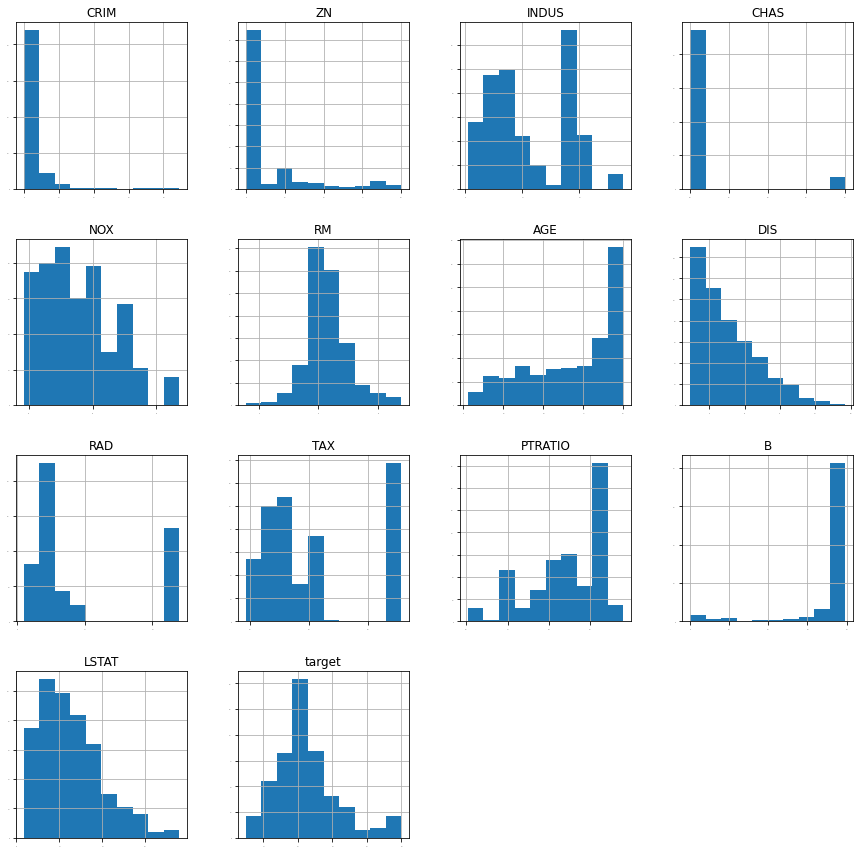

In [9]:
# Draw histogram of all columns, to understand the below points
    # 1. To know the distribution of data on high level
    # 2. To know the skewness of data
boston_df.hist(xlabelsize=1,ylabelsize=1,figsize=(15,15))


CRIM           AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CHAS        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
NOX           AxesSubplot(0.125,0.518913;0.168478x0.16413)
RM         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AGE        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DIS        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RAD           AxesSubplot(0.125,0.321957;0.168478x0.16413)
TAX        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PTRATIO    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
B          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
LSTAT            AxesSubplot(0.125,0.125;0.168478x0.16413)
target        AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

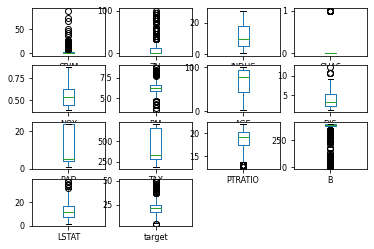

In [10]:
# Display the distribution of data using box plot. To view the outliers, MEAN, MEDIAN.
boston_df.plot(kind='box',layout=(4,4),fontsize=8,subplots=True, sharex=False, sharey=False)

In [11]:
# Pandas profiling helps to ease the descriptive analysis, but providing the summary of content in charts
#profile = ProfileReport(boston_df)
#profile.to_file('Boston_profilereport.html')

In [12]:
boston_df_copy = boston_df 

In [13]:
# Train test split of dataframe to train the model with train data & validate it using test data

boston_array = boston_df.values
X = boston_array[:,0:13]
Y = boston_array[:,13]

X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

379
127
379
127


In [17]:
# Building a set of models and measuring its results

models = []
models.append(('LINREG      ',LinearRegression()))
models.append(('Lasso       ',Lasso()))
models.append(('XGB         ',XGBRegressor()))
models.append(('DECISIONTREE',DecisionTreeRegressor()))
models.append(('RANDF       ',RandomForestRegressor()))
models.append(('GRADIENT    ',GradientBoostingRegressor()))
models.append(('ADABOOST    ',AdaBoostRegressor()))
models.append(('EXTRATRE    ',ExtraTreesRegressor()))



In [18]:
# In this set of code, we are iterating the list models and cross validation score is checked for each model.
results   = []
model_names =[]
kfold =KFold(n_splits=10)
for modelname, model in models:
    crossval_result = cross_val_score(model,X_train,Y_train,cv=kfold)
    results.append(crossval_result)
    model_names.append(modelname)
    print_data = "%s : %f " %(modelname,crossval_result.mean())
    print(print_data)
    

LINREG       : 0.721680 
Lasso        : 0.667593 
XGB          : 0.861289 
DECISIONTREE : 0.731482 
RANDF        : 0.848451 
GRADIENT     : 0.874006 
ADABOOST     : 0.814057 
EXTRATRE     : 0.876033 


# From the above results, we can conclude that ensemble models (random forest, adaboost, gradientboost,
# extra tree regressor) and Lineare regressor, XGB does better. Hence we can use those models with a 
# standardised data and validate the results


In [19]:
# Build a pipeline with standard scalar and model that performed better
pipeline_models = []
pipeline_models.append(('SCALED_LINREG  ',Pipeline([('Scaler',StandardScaler()),('LINREG',LinearRegression())])))
pipeline_models.append(('SCALED_XGB     ',Pipeline([('Scaler',StandardScaler()),('XGB',XGBRegressor())])))
pipeline_models.append(('SCALED_RANDF   ',Pipeline([('Scaler',StandardScaler()),('RANDF',RandomForestRegressor())])))
pipeline_models.append(('SCALED_GRADIENT',Pipeline([('Scaler',StandardScaler()),('GRADIENT',GradientBoostingRegressor())])))
pipeline_models.append(('SCALED_ADABOOST',Pipeline([('Scaler',StandardScaler()),('ADABOOST',AdaBoostRegressor())])))
pipeline_models.append(('SCALED_EXTRATRE',Pipeline([('Scaler',StandardScaler()),('EXTRATRE',ExtraTreesRegressor())])))

pipeline_models

[('SCALED_LINREG  ',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LINREG', LinearRegression())])),
 ('SCALED_XGB     ',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('XGB',
                   XGBRegressor(base_score=None, booster=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None, learning_rate=None,
                                max_delta_step=None, max_depth=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=100,
                                n_jobs=None, num_parallel_tree=None,
                                random_state=None, reg_alpha=None,
                                reg_lambda=None, scale_pos_weight=None,
                   

In [20]:
results   = []
model_names =[]
kfold =KFold(n_splits=10)
for modelname, model in pipeline_models:
    crossval_result = cross_val_score(model,X_train,Y_train,cv=kfold)
    results.append(crossval_result)
    model_names.append(modelname)
    print_data = "%s : %f " %(modelname,crossval_result.mean())
    print(print_data)
    

SCALED_LINREG   : 0.721680 
SCALED_XGB      : 0.861315 
SCALED_RANDF    : 0.846131 
SCALED_GRADIENT : 0.874898 
SCALED_ADABOOST : 0.809908 
SCALED_EXTRATRE : 0.874437 


# From the above figures, we can conclude that Gradient boosting, extra tree regressor does better. Both of them had accuracy > 87 %. 

# Hence we will choose both of them and do hyper parameter tuning

In [21]:

seed = 10
scaledX = StandardScaler().fit_transform(X_train)
model = GradientBoostingRegressor(random_state=seed)
parameter_grid = dict(n_estimators=np.array([50,100,150,200,300,400]))
k_fold = KFold(n_splits=10)
gridsearch_gradient = GridSearchCV(estimator=model,param_grid=parameter_grid,cv=kfold)
grid_result_gradient = gridsearch_gradient.fit(scaledX,Y_train)

In [22]:
print('Best score gradient ',grid_result_gradient.best_score_, '\n' ,'Best estimator',grid_result_gradient.best_estimator_)

Best score gradient  0.8748392501017028 
 Best estimator GradientBoostingRegressor(n_estimators=200, random_state=10)


In [23]:
seed = 10
scaledX = StandardScaler().fit_transform(X_train)
model = ExtraTreesRegressor(random_state=seed)
parameter_grid = dict(n_estimators=np.array([50,100,150,200,300,400]))
k_fold = KFold(n_splits=10)
gridsearch_xtra  = GridSearchCV(estimator=model,param_grid=parameter_grid,cv=kfold)
grid_result_xtra = gridsearch_xtra.fit(scaledX,Y_train)

In [24]:
print('Best score Xtra ',grid_result_xtra.best_score_, '\n' ,'Best estimator',grid_result_xtra.best_estimator_)

Best score Xtra  0.8756220446140697 
 Best estimator ExtraTreesRegressor(n_estimators=50, random_state=10)


In [26]:
# Finalized Model
# choosing the better model gradient boosting. Even though the score is slightly higher in extrac tree regressor, when compared
# CPU consumption, Gradient boosting is faster. Hence using it as a finalized model
seed = 10
scaledX = StandardScaler().fit_transform(X_train)
model = GradientBoostingRegressor(n_estimators=400,random_state=seed)
model.fit(scaledX,Y_train)


In [30]:
# Store the trained model as a pickle file, so that it can be re-used directly
pickle.dump(model,open('Boston_final_model.pkl','wb'))


In [35]:
# Load the model that is saved as a pickle
Boston_pickled_model = pickle.load(open('Boston_final_model.pkl', 'rb'))


In [36]:
# Apply the standardization on the test data and use if for prediction
scaledtestx = StandardScaler().fit_transform(X_test)
Y_pred_final = Boston_pickled_model.predict(scaledtestx)

In [37]:
# Performance measures of the model
print('R2_score                 - ' ,r2_score(Y_test,Y_pred_final))
print('mean squared error       - ' , mean_squared_error(Y_test,Y_pred_final))
print('Root mean squared errorr - ' ,np.sqrt(mean_squared_error(Y_test,Y_pred_final)))

r2_score                 -  0.7702070834747274
mean squared error       -  22.90754337700462
Root mean squared errorr -  4.7861825473966855


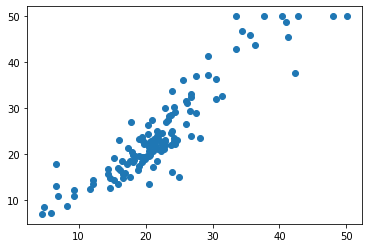

In [28]:
# Plot the prdicted result with the actual target variable to see how the prediction stays closer to the actual result.
plt.scatter(Y_pred_final,Y_test)

# Conclusion
The model Gradient boosting regression has a better result when compared to other models. Hence we created a pickle with that model and load it from pickle. Below are the performance of the model

R2_score                 -  0.7702070834747274
mean squared error       -  22.90754337700462
Root mean squared errorr -  4.7861825473966855